# Audio Process
This notebooks needs the podcastmix subset to be in the same directory of this notebook. If you run all the cells from FinalProject_dataset_creation notebook the dataset should already be in the required location and you skip the cell below and go directly to the "!pip install requirements" cell. However, if you wanted to save some time and directly download the dataset, without running the FinalProject_dataset_creation notebook, you must run the cell below:

# Install required packages

In [1]:
!pip install pytorch-lightning
!pip install asteroid
!pip install ffmpeg
!pip install torchaudio

  Using cached https://files.pythonhosted.org/packages/7b/39/ec22cf5675473b7ea496e5fd64df49dc3122f1cfe3646d72c84f0e7fe74a/pytorch-lightning-0.5.3.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/9e/29/bbf3414ba3d03cf1f8d8516e56d69e44ec0ad3fc79a3713b1c6809070e7d/scikit_learn-0.20.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/88/d3213e2f3492daf09d8b41631ad6899f56db17ce83ea9c8a579902bafe5e/tqdm-4.35.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/90/59eec88c0b2ac9e47fe135959007acb93a3cc9f7146366e11fecf718dd15/twine-1.13.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1f/c7/198496417c9c2f6226616cff7dedf2115a4f4d0276613bab842ec8ac1e23/numpy-1.16.4-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/46/ca/306bb933a68b888ab1c20ede0342506b85857635f04fb55a56e53065579b/torch-1.4.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https:

# Analize data

## Speaker dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('podcastmix/metadata/train/speech.csv')
train_data['subset'] = 'train'
val_data = pd.read_csv('podcastmix/metadata/val/speech.csv')
val_data['subset'] = 'val'
test_data = pd.read_csv('podcastmix/metadata/test/speech.csv')
test_data['subset'] = 'test'
data = pd.concat([train_data, val_data, test_data], ignore_index = True)
data.head()

,speech_ID,speaker_id,speaker_age,speaker_gender,speaker_accent,speech_path,length,subset
0,p363_138_mic2,p363,22,M,Canadian,podcastmix/train/speech/p363_138_mic2.flac,131867,train
1,p294_379_mic2,p294,33,F,American,podcastmix/train/speech/p294_379_mic2.flac,137106,train
2,p343_050_mic2,p343,27,F,Canadian,podcastmix/train/speech/p343_050_mic2.flac,150837,train
3,p300_203_mic1,p300,23,F,American,podcastmix/train/speech/p300_203_mic1.flac,177039,train
4,p245_264_mic2,p245,25,M,Irish,podcastmix/train/speech/p245_264_mic2.flac,117504,train


In [3]:
val_data

,speech_ID,speaker_id,speaker_age,speaker_gender,speaker_accent,speech_path,length,subset
0,p243_251_mic1,p243,22,M,English,podcastmix/val/speech/p243_251_mic1.flac,156393,val
1,p273_151_mic1,p273,23,M,English,podcastmix/val/speech/p273_151_mic1.flac,116416,val
2,p282_366_mic1,p282,23,F,English,podcastmix/val/speech/p282_366_mic1.flac,106694,val
3,p376_260_mic2,p376,22,M,Indian,podcastmix/val/speech/p376_260_mic2.flac,111153,val
4,p256_172_mic1,p256,24,M,English,podcastmix/val/speech/p256_172_mic1.flac,130889,val
...,...,...,...,...,...,...,...,...
8828,p310_313_mic2,p310,21,F,American,podcastmix/val/speech/p310_313_mic2.flac,129325,val
8829,p227_290_mic2,p227,38,M,English,podcastmix/val/speech/p227_290_mic2.flac,183357,val
8830,p246_179_mic1,p246,22,M,Scottish,podcastmix/val/speech/p246_179_mic1.flac,203422,val
8831,p233_289_mic1,p233,23,F,English,podcastmix/val/speech/p233_289_mic1.flac,98951,val


In [26]:
speakers_dict = {}
for speaker_id in val_data.speaker_id.unique():
    speakers_dict[speaker_id] = val_data.loc[
        val_data['speaker_id'] == speaker_id
    ]

In [27]:
speakers_dict
import random

In [29]:
list_of_speakers = list(speakers_dict.keys())
list_of_speakers.remove('p330')
non_speaker_id = random.sample(list_of_speakers, 1)[0]

In [30]:
non_speaker_id

'p266'

In [35]:
data.groupby("subset").mean()

,speaker_age,length
subset,,
test,22.649270,147415.671912
train,22.665138,148729.049758
val,22.708140,148362.043700


In [5]:
data.groupby("subset").std()

,speaker_age,length
subset,,
test,2.898600,50619.922467
train,2.945778,53414.881271
val,2.948025,51236.170995


In [6]:
data.groupby("speaker_accent").count()

,speech_ID,speaker_id,speaker_age,speaker_gender,speech_path,length,subset
speaker_accent,,,,,,,
American,16978,16978,16978,16978,16978,16978,16978
Australian,1646,1646,1646,1646,1646,1646,1646
British,796,796,796,796,796,796,796
Canadian,6302,6302,6302,6302,6302,6302,6302
English,27272,27272,27272,27272,27272,27272,27272
Indian,2328,2328,2328,2328,2328,2328,2328
Irish,7246,7246,7246,7246,7246,7246,7246
NewZealand,844,844,844,844,844,844,844
NorthernIrish,5160,5160,5160,5160,5160,5160,5160


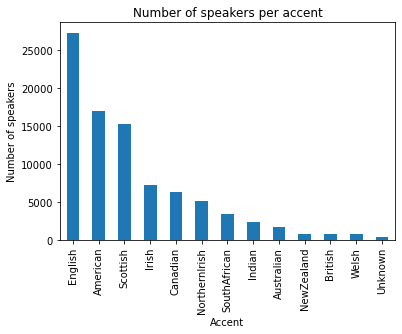

In [52]:
fig, ax = plt.subplots()
fig.figsize=(8,8)
fig.edgecolor='black'
ax.set_xlabel('Accent')
ax.set_ylabel('Number of speakers')
ax.set_title('Number of speakers per accent')
data['speaker_accent'].value_counts().plot(kind='bar')


In [67]:
dictionary = train_data['speaker_accent'].value_counts()
x = list(dictionary.keys())
p = [dictionary[key] for key in x]
dictionary = test_data['speaker_accent'].value_counts()
q = [dictionary[key] for key in x]
dictionary = val_data['speaker_accent'].value_counts()
r = [dictionary[key] for key in x]

In [87]:
len(r)

13

In [84]:
import numpy as np

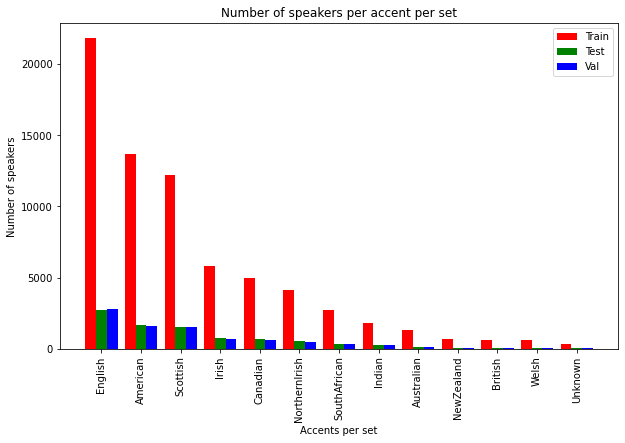

In [113]:
N = 13
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

yvals = p
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = q
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = r
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_title('Number of speakers per accent per set')
ax.set_ylabel('Number of speakers')
ax.set_xlabel('Accents per set')
ax.set_xticks(ind+width)
ax.set_xticklabels( (x) )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Train', 'Test', 'Val') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
plt.xticks(rotation='vertical')
plt.show()

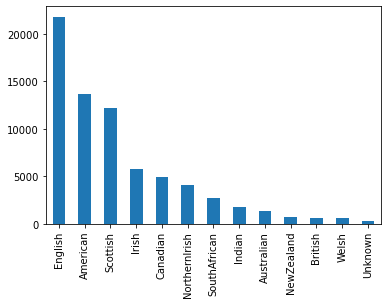

In [8]:
train_data['speaker_accent'].value_counts().plot(kind='bar')

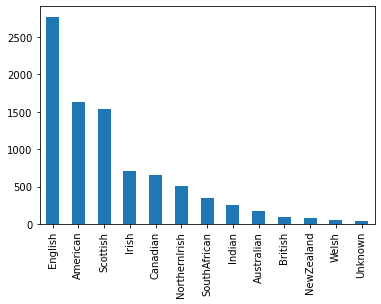

In [9]:
val_data['speaker_accent'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Gender frequency')

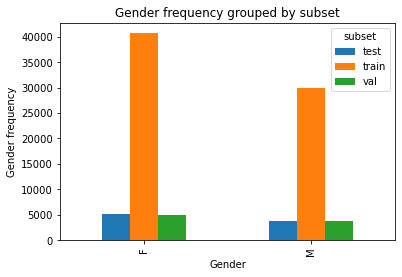

In [10]:
%matplotlib inline
pd.crosstab(data.speaker_gender, data.subset).plot(kind="bar")
plt.title("Gender frequency grouped by subset")
plt.xlabel("Gender")
plt.ylabel("Gender frequency")

Text(0, 0.5, 'Frequency')

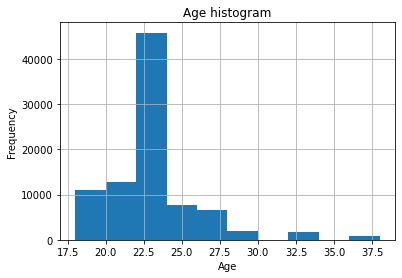

In [11]:
%matplotlib inline
data.speaker_age.hist()
plt.title("Age histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")

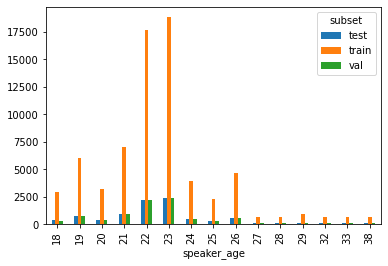

In [12]:
pd.crosstab(data.speaker_age, data.subset).plot(kind="bar")

# For the music:

In [118]:
# load music
train_data = pd.read_csv('podcastmix/metadata/train/music.csv')
train_data['subset'] = 'train'
val_data = pd.read_csv('podcastmix/metadata/val/music.csv')
val_data['subset'] = 'val'
test_data = pd.read_csv('podcastmix/metadata/test/music.csv')
test_data['subset'] = 'test'
data_csv = pd.concat([train_data, val_data, test_data], ignore_index = True)
data_csv.head()

,music_ID,jamendo_id,name,artist_name,album_name,license_ccurl,releasedate,image,vocalinstrumental,lang,gender,acousticelectric,speed,tags,music_path,length,subset
0,1000957,1000957,Key to Success - Discover the Possibility,Akashic Records,Corporate Presentation - Key To Success,http://creativecommons.org/licenses/by-nc-nd/3.0/,2013-01-20,https://images.jamendo.com/albums/s117/117782/...,instrumental,NaN,neutral,electric,medium,"{""genres"": [""corporate""/ ""filmscore""]/ ""instru...",podcastmix/train/music/1000957.flac,7497000,train
1,1319497,1319497,Spread Your Wings,Niki J Crawford,The Genesis Block EP,http://creativecommons.org/licenses/by-nc-nd/3.0/,2016-02-18,https://images.jamendo.com/albums/s156/156458/...,vocal,en,female,NaN,medium,"{""genres"": [""soul""/ ""rnb""/ ""pop""]/ ""instrument...",podcastmix/train/music/1319497.flac,8376060,train
2,1245169,1245169,Drama,Matti Paalanen,Emotion,http://creativecommons.org/licenses/by-nc-nd/3.0/,2015-06-27,https://images.jamendo.com/albums/s149/149178/...,instrumental,NaN,NaN,NaN,medium,"{""genres"": [""filmscore""]/ ""instruments"": []/ ""...",podcastmix/train/music/1245169.flac,6098195,train
3,11751,11751,Urban,Tom La Meche,Blog,http://creativecommons.org/licenses/by-nc-nd/3.0/,2006-04-22,https://images.jamendo.com/albums/s1/1741/cove...,instrumental,NaN,neutral,electric,medium,"{""genres"": [""jazz""/ ""nujazz""]/ ""instruments"": ...",podcastmix/train/music/11751.flac,12304128,train
4,490932,490932,chillin',Electric Grocery,enjoy,http://creativecommons.org/licenses/by-nc-sa/3.0/,2009-12-19,https://images.jamendo.com/albums/s57/57543/co...,instrumental,NaN,NaN,NaN,medium,"{""genres"": [""jazz""/ ""ambient""/ ""nujazz""]/ ""ins...",podcastmix/train/music/490932.flac,14271963,train


In [119]:
import json

In [121]:
genres_train_count = {}
vartags_train_count = {}
for i in range(len(train_data)):
    row = train_data.iloc[i]
    tags = json.loads(row["tags"].replace('/',','))
    genres = tags['genres']
    vartags = tags['vartags']
    for genre in genres:
        if genre not in genres_train_count:
            genres_train_count[genre] = 1
        else:
            genres_train_count[genre] += 1
    for vartag in vartags:
        if vartag not in vartags_train_count:
            vartags_train_count[vartag] = 1
        else:
            vartags_train_count[vartag] += 1

print(genres_train_count)
print(vartags_train_count)

{'corporate': 167, 'filmscore': 1046, 'soul': 115, 'rnb': 170, 'pop': 2371, 'jazz': 709, 'nujazz': 48, 'ambient': 895, 'classical': 888, 'rock': 2857, 'world': 503, 'metal': 554, 'downtempo': 263, 'triphop': 317, 'indietronica': 10, 'reggae': 292, 'bossanova': 35, 'symphonic': 80, 'rocknroll': 40, 'indie': 664, 'funk': 248, 'electronic': 2564, 'folk': 824, 'jazzfunk': 24, 'experimental': 273, 'cabaret': 5, 'idm': 31, 'singersongwriter': 320, 'dreampop': 18, 'acidjazz': 44, 'techno': 245, 'drumnbass': 115, 'breakbeat': 77, 'jungle': 56, 'newage': 386, 'grunge': 62, 'hiphop': 596, 'reggaeton': 18, 'latin': 187, 'rocksteady': 2, 'classicrock': 46, 'gothic': 55, 'synthpop': 38, 'dance': 555, 'celtic': 73, 'punk': 197, 'intro': 27, 'country': 167, 'house': 243, 'ska': 76, 'dub': 79, 'trance': 289, 'chillout': 574, 'rap': 207, 'electrofunk': 6, 'baroque': 40, 'jazzfusion': 25, 'freejazz': 3, 'dubstep': 57, 'indierock': 82, 'ragga': 28, 'mambo': 8, 'smoothjazz': 24, 'rumba': 2, 'latinjazz': 1

In [122]:
genres_test_count = {}
vartags_test_count = {}
for i in range(len(test_data)):
    row = test_data.iloc[i]
    tags = json.loads(row["tags"].replace('/',','))
    genres = tags['genres']
    vartags = tags['vartags']
    for genre in genres:
        if genre not in genres_test_count:
            genres_test_count[genre] = 1
        else:
            genres_test_count[genre] += 1
    for vartag in vartags:
        if vartag not in vartags_test_count:
            vartags_test_count[vartag] = 1
        else:
            vartags_test_count[vartag] += 1

print(genres_test_count)
print(vartags_test_count)

{'breakbeat': 11, 'electronic': 320, 'drumnbass': 14, 'rock': 368, 'pop': 315, 'world': 61, 'celtic': 17, 'folk': 113, 'singersongwriter': 56, 'techno': 36, 'house': 28, 'reggae': 34, 'dub': 9, 'rnb': 16, 'electropop': 11, 'metal': 83, 'heavymetal': 4, 'darkambient': 8, 'drone': 2, 'deathmetal': 6, 'filmscore': 146, '8bit': 6, 'ambient': 106, 'corporate': 21, 'indie': 79, 'indierock': 8, 'rap': 28, 'hiphop': 68, 'triphop': 37, 'classical': 96, 'trance': 36, 'dance': 67, 'jazz': 91, 'jazzfunk': 1, 'latin': 25, 'experimental': 35, 'funk': 26, 'symphonic': 15, 'chillout': 56, 'flamenco': 5, 'country': 19, 'bebop': 2, 'downtempo': 26, 'acidjazz': 5, 'hardcore': 7, 'newage': 48, 'production': 6, 'jazzfusion': 2, 'indietronica': 2, 'dreampop': 4, 'blues': 23, 'swing': 14, 'electroswing': 4, 'rumba': 1, 'punk': 23, 'tribal': 3, 'grunge': 13, 'bossanova': 3, 'gothic': 12, 'poprock': 14, 'latinjazz': 1, 'chansonfrancaise': 12, 'bolero': 1, 'soul': 14, 'synthwave': 4, 'darkwave': 6, 'shoegaze': 

In [123]:
genres_val_count = {}
vartags_val_count = {}
for i in range(len(val_data)):
    row = val_data.iloc[i]
    tags = json.loads(row["tags"].replace('/',','))
    genres = tags['genres']
    vartags = tags['vartags']
    for genre in genres:
        if genre not in genres_val_count:
            genres_val_count[genre] = 1
        else:
            genres_val_count[genre] += 1
    for vartag in vartags:
        if vartag not in vartags_val_count:
            vartags_val_count[vartag] = 1
        else:
            vartags_val_count[vartag] += 1

print(genres_val_count)
print(vartags_val_count)

{'pop': 287, 'rocknroll': 5, 'indie': 82, 'jazz': 89, 'classical': 118, 'singersongwriter': 38, 'rock': 363, 'electronic': 328, 'chillout': 87, 'idm': 8, 'indierock': 13, 'trance': 25, 'filmscore': 136, 'postrock': 6, 'techno': 39, 'dance': 60, 'alternativerock': 12, 'triphop': 42, 'hiphop': 78, 'reggae': 44, 'electropop': 14, 'bossanova': 2, 'corporate': 14, 'swing': 13, 'gypsy': 5, 'ambient': 118, 'house': 30, 'metal': 82, 'newage': 47, 'world': 68, 'hardcore': 8, 'heavymetal': 8, 'funk': 31, 'cabaret': 3, 'waltz': 3, 'latin': 24, 'rap': 24, 'bebop': 1, 'smoothjazz': 2, 'garage': 1, 'progressiverock': 2, 'blues': 22, 'soul': 15, 'dubstep': 8, 'reggaeton': 2, 'indiepop': 8, 'jazzfusion': 2, 'rnb': 14, 'downtempo': 31, 'deephouse': 3, 'breakbeat': 18, 'african': 9, 'oriental': 5, 'celtic': 10, 'tribal': 2, 'acidhouse': 3, 'country': 24, 'folk': 109, 'deathmetal': 9, 'punk': 28, 'jungle': 3, 'baroque': 9, 'classicrock': 5, 'industrial': 11, 'jazzfunk': 4, 'drumnbass': 13, 'experimental'

In [15]:
genres_train_count = {}
vartags_train_count = {}
for i in range(len(data_csv)):
    row = data_csv.iloc[i]
    tags = json.loads(row["tags"].replace('/',','))
    genres = tags['genres']
    vartags = tags['vartags']
    for genre in genres:
        if genre not in genres_count:
            genres_count[genre] = 1
        else:
            genres_count[genre] += 1
    for vartag in vartags:
        if vartag not in vartags_count:
            vartags_count[vartag] = 1
        else:
            vartags_count[vartag] += 1

print(genres_count)
print(vartags_count)

{'corporate': 202, 'filmscore': 1328, 'soul': 144, 'rnb': 200, 'pop': 2973, 'jazz': 889, 'nujazz': 56, 'ambient': 1119, 'classical': 1102, 'rock': 3588, 'world': 632, 'metal': 719, 'downtempo': 320, 'triphop': 396, 'indietronica': 13, 'reggae': 370, 'bossanova': 40, 'symphonic': 101, 'rocknroll': 49, 'indie': 825, 'funk': 305, 'electronic': 3212, 'folk': 1046, 'jazzfunk': 29, 'experimental': 338, 'cabaret': 9, 'idm': 43, 'singersongwriter': 414, 'dreampop': 23, 'acidjazz': 53, 'techno': 320, 'drumnbass': 142, 'breakbeat': 106, 'jungle': 66, 'newage': 481, 'grunge': 81, 'hiphop': 742, 'reggaeton': 22, 'latin': 236, 'rocksteady': 4, 'classicrock': 56, 'gothic': 70, 'synthpop': 49, 'dance': 682, 'celtic': 100, 'punk': 248, 'intro': 36, 'country': 210, 'house': 301, 'ska': 92, 'dub': 94, 'trance': 350, 'chillout': 717, 'rap': 259, 'electrofunk': 8, 'baroque': 52, 'jazzfusion': 29, 'freejazz': 6, 'dubstep': 70, 'indierock': 103, 'ragga': 32, 'mambo': 8, 'smoothjazz': 28, 'rumba': 3, 'latinj

In [125]:
import operator

In [135]:
sorted_test_genres = dict( sorted(genres_test_count.items(), key=operator.itemgetter(1),reverse=True))
sorted_test_vartags = dict( sorted(vartags_test_count.items(), key=operator.itemgetter(1),reverse=True))
sorted_train_genres = dict( sorted(genres_train_count.items(), key=operator.itemgetter(1),reverse=True))
sorted_train_vartags = dict( sorted(vartags_train_count.items(), key=operator.itemgetter(1),reverse=True))
sorted_val_genres = dict( sorted(genres_val_count.items(), key=operator.itemgetter(1),reverse=True))
sorted_val_vartags = dict( sorted(vartags_val_count.items(), key=operator.itemgetter(1),reverse=True))

In [140]:
x = list(sorted_test_genres.keys())[0:20]
p = [sorted_train_genres[key] for key in x]
q = [sorted_test_genres[key] for key in x]
r = [sorted_val_genres[key] for key in x]

In [147]:
r

[363,
 328,
 287,
 136,
 109,
 118,
 118,
 89,
 82,
 82,
 78,
 60,
 68,
 38,
 87,
 47,
 42,
 39,
 25,
 30]

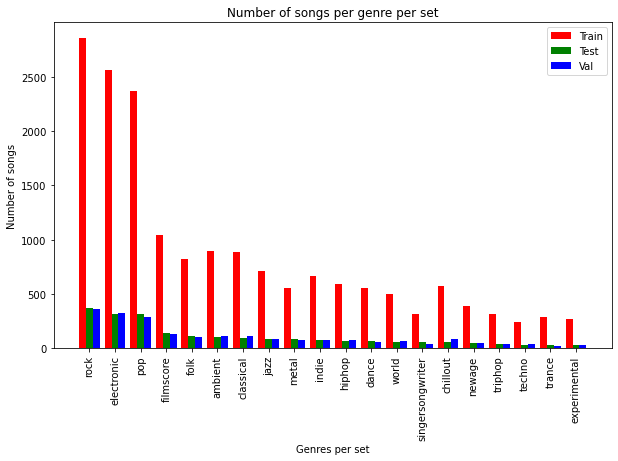

In [149]:
N = 20
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

yvals = p
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = q
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = r
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_title('Number of songs per genre per set')
ax.set_ylabel('Number of songs')
ax.set_xlabel('Genres per set')
ax.set_xticks(ind+width)
ax.set_xticklabels( (x) )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Train', 'Test', 'Val') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
plt.xticks(rotation='vertical')
plt.show()

In [150]:
x = list(sorted_test_vartags.keys())[0:20]
p = [sorted_train_vartags[key] for key in x]
q = [sorted_test_vartags[key] for key in x]
r = [sorted_val_vartags[key] for key in x]

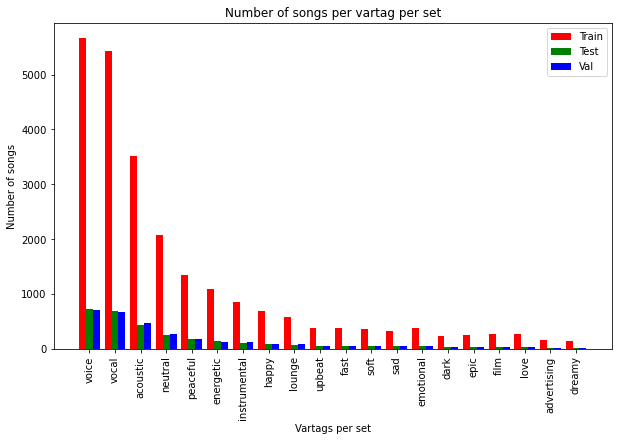

In [152]:
N = 20
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

yvals = p
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = q
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = r
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_title('Number of songs per vartag per set')
ax.set_ylabel('Number of songs')
ax.set_xlabel('Vartags per set')
ax.set_xticks(ind+width)
ax.set_xticklabels( (x) )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Train', 'Test', 'Val') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
N = 20
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

yvals = p
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = q
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = r
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_title('Number of speakers per accent per set')
ax.set_ylabel('Number of speakers')
ax.set_xlabel('Accents per set')
ax.set_xticks(ind+width)
ax.set_xticklabels( (x) )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Train', 'Test', 'Val') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
plt.xticks(rotation='vertical')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

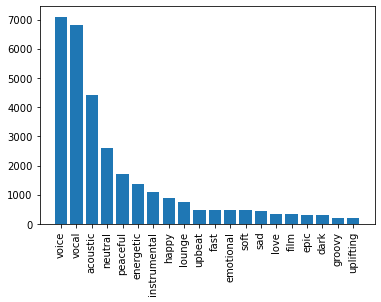

In [19]:
plt.bar(list(sorted_vartags.keys())[0:max_genres], list(sorted_vartags.values())[0:max_genres])
plt.xticks(rotation='vertical')

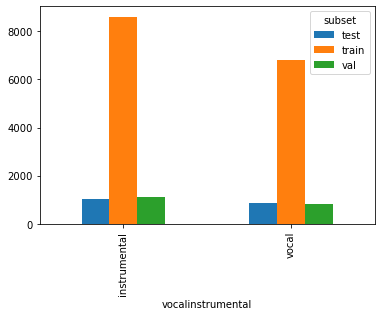

In [20]:
pd.crosstab(data_csv.vocalinstrumental, data_csv.subset).plot(kind="bar")

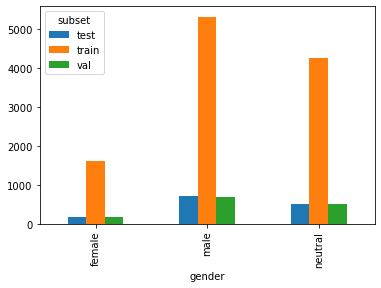

In [21]:
pd.crosstab(data_csv.gender, data_csv.subset).plot(kind="bar")

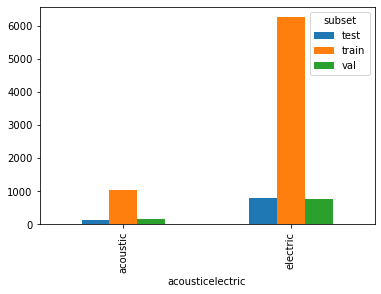

In [22]:
pd.crosstab(data_csv.acousticelectric, data_csv.subset).plot(kind="bar")

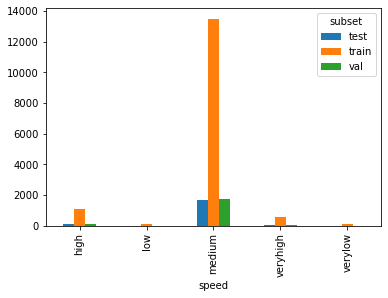

In [23]:
pd.crosstab(data_csv.speed, data_csv.subset).plot(kind="bar")

In [26]:
len(val_data)

1937

In [2]:
metrics = pd.read_csv('../../Downloads/experiments-defense-epochs/ConvTasNet_model/exp-92-epochs-LogL1/tmp/ConvTasNet_model/eval/tmp/all_metrics.csv')

In [3]:
import matplotlib.pyplot as plt    

In [4]:
without_index = metrics.drop(['Unnamed: 0'], axis=1)

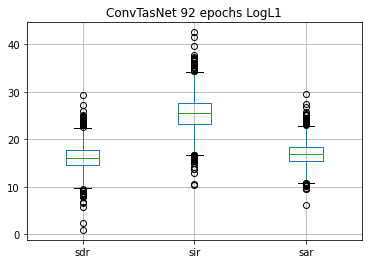

In [7]:
axes = without_index.boxplot(column=['sdr', 'sir', 'sar'])
title_boxplot = 'ConvTasNet 92 epochs LogL1'
plt.title( title_boxplot )
plt.show()

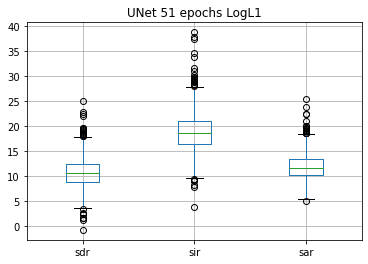

In [8]:
metrics = pd.read_csv('../../Desktop/exp-44100-51-e-LogL2/UNet_model/exp-44100-51-e-LogL2/tmp/UNet_model/eval/tmp/all_metrics.csv')
without_index = metrics.drop(['Unnamed: 0'], axis=1)
without_index.boxplot(column=['sdr', 'sir', 'sar'])
title_boxplot = 'UNet 51 epochs LogL1'
plt.title( title_boxplot )
plt.show()

In [71]:
without_index["sdr"]>18

0       False
1       False
2       False
3       False
4       False
        ...  
1932    False
1933    False
1934    False
1935    False
1936    False
Name: sdr, Length: 1937, dtype: bool

In [72]:
metrics

,Unnamed: 0,input_si_sdr,input_sdr,input_sir,input_sar,input_stoi,si_sdr,sdr,sir,sar,stoi
0,0,0.047440,0.078760,0.078760,152.945241,0.633346,12.902286,13.443705,21.619584,14.195148,0.844430
1,1,-0.080529,-0.051287,-0.051287,152.369325,0.663587,14.986272,15.317878,24.992563,15.897885,0.657941
2,2,0.030053,0.055214,0.055214,152.658040,0.707160,11.419689,12.174802,18.860195,13.286260,0.810261
3,3,-0.003112,0.007539,0.007539,152.839531,0.570262,12.879701,13.178356,23.780115,13.643451,0.668016
4,4,0.294288,0.796949,0.796949,151.785503,0.612120,5.157646,7.263264,15.786073,11.433932,0.580975
...,...,...,...,...,...,...,...,...,...,...,...
1932,1932,-0.013608,0.034553,0.034553,152.200640,0.559282,12.923563,13.123399,23.161099,13.604595,0.682884
1933,1933,0.131602,0.190430,0.190430,151.875353,0.605793,11.486515,12.124985,19.377347,13.124973,0.757391
1934,1934,-0.113163,-0.090300,-0.090300,152.243809,0.625846,7.924043,8.958798,15.010290,10.741752,0.758234
1935,1935,0.100544,0.136763,0.136763,152.594378,0.706906,5.974904,6.663296,13.175760,8.237348,0.715374


In [73]:
import numpy as np

In [74]:
df = pd.DataFrame(np.random.randn(10000, 3),
                  columns=['Col1', 'Col2', 'Col3'])

In [75]:
df

,Col1,Col2,Col3
0,0.397668,-0.875097,0.120277
1,1.869511,-1.491615,-1.065536
2,0.777149,0.616518,0.860068
3,1.146586,0.924310,-1.037584
4,0.094283,0.645252,-0.175847
...,...,...,...
9995,0.609031,-0.404769,-1.129228
9996,-0.766866,0.154695,-1.507295
9997,0.793994,0.182377,-1.875492
9998,1.641159,-0.688853,0.146205


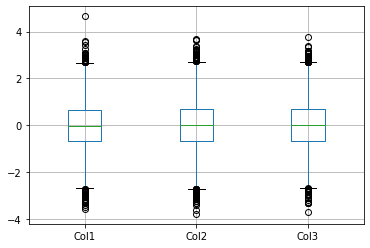

In [76]:
df.boxplot()